# Example `simcmb` notebook

Sam McDermott, 11 May 2023

explore some basic functionality of the `simcmb` fastsim code from DeepSkies

## Imports

In [1]:
import simcmb
import itertools
from matplotlib import pyplot as plt

%matplotlib inline

initialize the two most important objects:

`Yo0`: an instance of `simcmb.Yobj` that holds a CAMBparams instance and other metadata necessary to complete runs (noise, dictionaries of iterables that we might want to eventually cycle over, etc.)

`PM0`: an instance of `simcmb.PS_Maker` that stores results from CAMB runs and their associated parameter values

In [2]:
config_obj = simcmb.config_obj()
power_spectrum = simcmb.CAMBPowerSpectrum(config_obj)

here we are invoking the most important method of `PM0`, which takes the single kwarg `save_to_dict` if we want to save the run (if blank, it simply returns the results)

In [3]:
power_spectrum.get_cls(save_to_dict='a')

from 13:32:24.355434 P to 13:32:25.809939 P or 1.454505 seconds total


In [4]:
power_spectrum.get_cls()

from 13:32:35.643218 P to 13:32:37.006276 P or 1.363058 seconds total


{'l': range(0, 10001),
 'clTT': array([2.11539875e-06, 2.11539933e-06, 1.06537268e+03, ...,
        2.02284983e+00, 2.02826713e+00, 2.03371459e+00]),
 'clEE': array([4.23079750e-06, 4.23079866e-06, 3.16754551e-02, ...,
        3.88227153e+00, 3.89294573e+00, 3.90365037e+00]),
 'clBB': array([4.23079750e-06, 4.23079866e-06, 1.49760508e-03, ...,
        3.88202228e+00, 3.89269657e+00, 3.90340128e+00]),
 'clTE': array([4.23079750e-06, 4.23079866e-06, 2.65765311e+00, ...,
        3.88023420e+00, 3.89090931e+00, 3.90161491e+00]),
 'clPP': array([0.00000000e+00, 0.00000000e+00, 5.01389375e-08, ...,
        6.65085959e-11, 6.64838627e-11, 6.64591380e-11]),
 'clPT': array([0.00000000e+00, 0.00000000e+00, 1.09584897e-09, ...,
        1.07894364e-15, 1.07664079e-15, 1.07433516e-15]),
 'clPE': array([ 0.00000000e+00,  0.00000000e+00, -4.57837602e-12, ...,
         2.49864228e-19,  2.49924666e-19,  2.49984326e-19])}

only one of these runs has been saved (showing the relevant parameters instead of the results, for space)

In [5]:
power_spectrum.result_parameters

{'a': {'FORCAMB': {'max_l': 10300,
   'max_l_tensor': 10300,
   'CustomSources': {'c_source_func': '~'}},
  'ITERABLES': {'InitPower.r': array([0.01 , 0.055, 0.1  ]),
   'Alens': array([0.8, 1. , 1.2])},
  'seed': 0,
  'verbose': 1,
  'normalize_cls': False,
  'TT_units': 'muK',
  'outfile_dir': 'outfiles',
  'noise_type': 'white',
  'noise_level': 5,
  'beam_fwhm': 3,
  'extra_l': 300,
  'max_l_use': 10000}}

we can update the values and rerun without instantiating a new `Yobj`

In [6]:
config_obj.update_val('InitPower.r', 0.04)

updated InitPower.r in CAMBparams


In [7]:
power_spectrum.get_cls(save_to_dict='b')

from 13:32:55.705496 P to 13:32:57.196274 P or 1.490778 seconds total


now two different results have been saved (showing the relevant parameters instead of the results, for space)

In [8]:
power_spectrum.result_parameters

{'a': {'FORCAMB': {'max_l': 10300,
   'max_l_tensor': 10300,
   'CustomSources': {'c_source_func': '~'}},
  'ITERABLES': {'InitPower.r': array([0.01 , 0.055, 0.1  ]),
   'Alens': array([0.8, 1. , 1.2])},
  'seed': 0,
  'verbose': 1,
  'normalize_cls': False,
  'TT_units': 'muK',
  'outfile_dir': 'outfiles',
  'noise_type': 'white',
  'noise_level': 5,
  'beam_fwhm': 3,
  'extra_l': 300,
  'max_l_use': 10000},
 'b': {'FORCAMB': {'max_l': 10300,
   'max_l_tensor': 10300,
   'InitPower': {'r': 0.04},
   'CustomSources': {'c_source_func': '~'}},
  'ITERABLES': {'InitPower.r': array([0.01 , 0.055, 0.1  ]),
   'Alens': array([0.8, 1. , 1.2])},
  'seed': 0,
  'verbose': 1,
  'normalize_cls': False,
  'TT_units': 'muK',
  'outfile_dir': 'outfiles',
  'noise_type': 'white',
  'noise_level': 5,
  'beam_fwhm': 3,
  'extra_l': 300,
  'max_l_use': 10000}}

we can loop over preset ranges of variables (given in `'ITERABLES'` of the `Yo0` instances):

In [9]:
power_spectrum.loop_sims(user_params=True)

updated InitPower.r in CAMBparams
updated Alens in CAMBparams
from 13:33:10.195485 P to 13:33:11.658084 P or 1.462599 seconds total
updated InitPower.r in CAMBparams
updated Alens in CAMBparams
from 13:33:11.659765 P to 13:33:13.081080 P or 1.421315 seconds total
updated InitPower.r in CAMBparams
updated Alens in CAMBparams
from 13:33:13.082657 P to 13:33:14.458371 P or 1.375714 seconds total
updated InitPower.r in CAMBparams
updated Alens in CAMBparams
from 13:33:14.460076 P to 13:33:15.859376 P or 1.399300 seconds total
updated InitPower.r in CAMBparams
updated Alens in CAMBparams
from 13:33:15.861028 P to 13:33:17.278544 P or 1.417516 seconds total
updated InitPower.r in CAMBparams
updated Alens in CAMBparams
from 13:33:17.280261 P to 13:33:18.714606 P or 1.434345 seconds total
updated InitPower.r in CAMBparams
updated Alens in CAMBparams
from 13:33:18.716299 P to 13:33:20.160860 P or 1.444561 seconds total
updated InitPower.r in CAMBparams
updated Alens in CAMBparams
from 13:33:20.

IDs for those runs have been automatically generated and saved in PM0.loop_runids

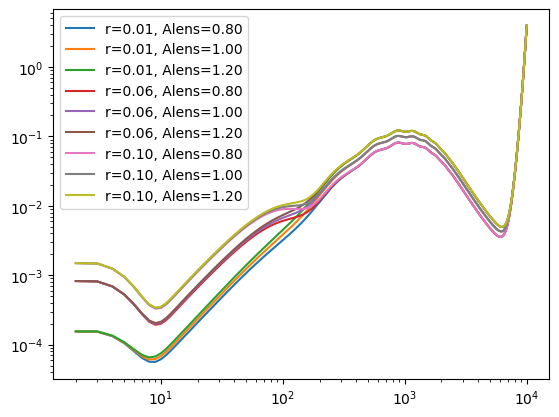

In [11]:
for r in power_spectrum.loop_runids:
    d, p = power_spectrum.results[r], power_spectrum.result_parameters[r]
    try:
        label_r = p['FORCAMB']['InitPower']['r']
    except KeyError:
        label_r = config_obj._all_params_dict['BASECAMBPARAMS']['InitPower']['r']
    try:
        label_A = p['FORCAMB']['Alens']
    except KeyError:
        label_A = config_obj._all_params_dict['BASECAMBPARAMS']['Alens']
    plt.plot(d['l'][2:], d['clBB'][2:],
             label=f"r={label_r:.2f}, Alens={label_A:.2f}")
plt.loglog()
plt.legend()
plt.show()

it is easy to save the results and the corresponding parameter information to a directory of your choice

In [12]:
# power_spectrum.savecls(savedir="/Users/sammcd/simcmb/simcmb/outfiles/", permission='w')

## flat-sky plotting 

to generate a plot or set of plots from the results above, we provide `simcmb.clplotting`

In [14]:
f1 = simcmb.cl_plotting.flatmap(192, 5, cl_dict=power_spectrum.results[power_spectrum.loop_runids[0]])

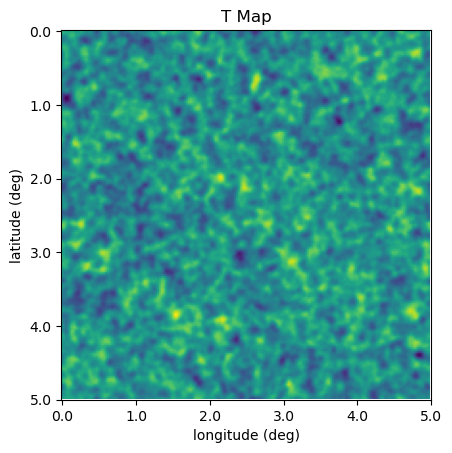

In [15]:
plt.imshow(f1.flatmap('T', seed = 0)[0])
plt.title("T Map")
plt.xlabel("longitude (deg)")
plt.ylabel("latitude (deg)")
plt.xticks(f1.ticks, f1.labels)
plt.yticks(f1.ticks, f1.labels)
plt.show()

note that these results aren't exactly reproducible across calls when fixing the `seed` kwarg (despite `namaster` documentation indicating that this is the expected behavior), but the sum across the entire map appears to be constant when fixing the `seed` kwarg (in contrast to substantial deviation when changing `seed`)

In [16]:
np.allclose(f1.flatmap('T', seed = 0)[0], f1.flatmap('T', seed = 0)[0]),\
np.sum(f1.flatmap('T', seed = 0)[0] - f1.flatmap('T', seed = 0)[0]),\
np.sum(f1.flatmap('T', seed = 1)[0] - f1.flatmap('T', seed = 0)[0])

(False, -1.3969838619232178e-09, -302.0939735546708)

we can call T, E, B, or Phi maps, or a set of TEB or TQU maps

In [17]:
f1.flatmap('TEB').shape

(3, 192, 192)

In [18]:
f1.flatmap('TQU').shape

(3, 192, 192)

if you don't want to restrict to a `cl_dict` dictionary, use `self._flatmap` instead

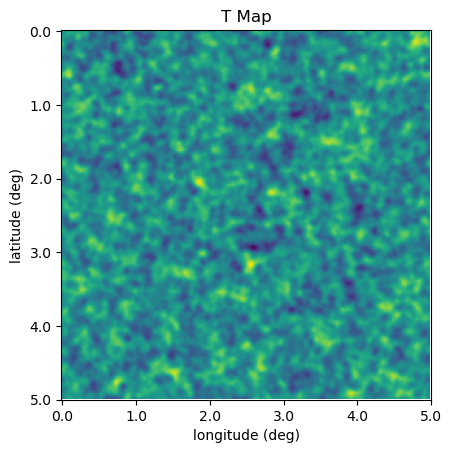

In [20]:
f2 = simcmb.cl_plotting.flatmap(192, 5)
plt.imshow(f2._flatmap([power_spectrum.results[power_spectrum.loop_runids[0]]['clTT']])[0])
plt.title("T Map")
plt.xlabel("longitude (deg)")
plt.ylabel("latitude (deg)")
plt.xticks(f2.ticks, f2.labels)
plt.yticks(f2.ticks, f2.labels)
plt.show()